In [1]:

from dist_analy.pypdb import Query, get_pdb_file
from dist_analy.dist_analy import get_shortest_dist_matrix, get_ca_dist_matrix
import dist_analy.import_pdb
import dist_analy.pca
from dist_analy.determine_seq import get_and_align_sequence, get_conserved, get_klifs_res, def_union
from dist_analy.util.pdb_info import pdb_csv, get_any_info
from sklearn import decomposition
import dist_analy.pca
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

%load_ext autoreload
%autoreload 2

### Get conserved residues from UniProt sequences and then get KLIFS residues

In [5]:
UNIPROT_LIST = ['P00533','Q61527', 'Q62956', 'Q62799', 'P06494', 'P55245', 
                'Q01279', 'Q61526', 'P21860', 'P04626', 'Q15303', 'P70424', 
                'O18735', 'Q60553', 'P04412', 'P0CY46', 'Q5RB22',
                'P00535', 'P00534', 'P11273' ]
NAME = ['EGFR_HUMAN', 'ERBB4_MOUSE', 'ERBB4_RAT', 'ERBB3_RAT', 'ERBB2_RAT','EGFR_MACMU', 
        'EGFR_MOUSE', 'ERBB3_MOUSE', 'ERBB3_HUMAN', 'ERBB2_HUMAN', 'ERBB4_HUMAN', 'ERBB2_MOUSE',
        'ERBB2_CANLF', 'ERBB2_MESAU', 'EGFR_DROME', 'EGFR_APIME', 'ERBB3_PONAB', 
        'ERBB_AVIER', 'ERBB_ALV', 'ERBB_AVIEU']

alignment = get_and_align_sequence( './egfr/', 'egfr_fam', UNIPROT_LIST, prot_list=NAME)
cons_id = get_conserved(alignment)
klifs_res = get_klifs_res('2GS7','A')
egfr_klifs_ident, union_id = def_union(cons_id[NAME.index('EGFR_HUMAN')], klifs_res)

## kinase region 712-979
## KLIFs numbering does not match uniprot numbering

OSError: [Errno 22] Invalid argument: 'egfr_famfasta/./egfr/'

Because the structure 2GS7 residue numbering does not match the UniProt residue numbering, I manually applied a shift to get the correct residue numbering of the KLIFs residues.

In [117]:
## Reference papers will denote residues 831-834 as the DFG motif
print(uniprot_seq[831:834])
## The UniProt sequence on the other indicates resides 855-858 are the DFG motif 
## (UniProt sequences are 1 indexed)
shift = 854-831
print(831+shift+1, uniprot_seq[854:857], 834+shift+1)
print(shift)

print(uniprot_seq[738+shift], 738+shift+1)
print(uniprot_seq[721+shift], 721+shift+1)
print(uniprot_seq[836+shift], 836+shift+1)

RLV
855 DFG 858
23
E 762
K 745
K 860


In [102]:
klifs_res_1 = [x+shift for x in klifs_res]
egfr_klifs_ident_1, union_id = def_union(cons_id[NAME.index('EGFR_HUMAN')], klifs_res_1)

In [103]:
print(egfr_klifs_ident_1)

[582, 584, 587, 591, 592, 595, 596, 617, 620, 624, 628, 636, 669, 683, 690, 691, 692, 694, 700, 705, 706, 708, 711, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 731, 733, 735, 736, 740, 741, 742, 743, 744, 745, 746, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 771, 772, 773, 774, 775, 776, 777, 778, 779, 781, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 810, 814, 815, 816, 817, 820, 821, 822, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 848, 851, 852, 853, 854, 855, 856, 857, 858, 859, 862, 875, 877, 878, 879, 880, 882, 883, 884, 886, 892, 895, 896, 897, 898, 901, 902, 903, 905, 906, 909, 911, 914, 928, 930, 933, 935, 936, 938, 939, 942, 944, 950, 951, 954, 958, 959, 961, 964, 968, 973, 974, 975, 977, 981]


Get the UNIPROT sequence

In [2]:
egfr_uniprot = 'P00533'
found_pdbs = Query(egfr_uniprot, query_type="uniprot").search()

In [54]:
uniprot_root = 'https://www.ebi.ac.uk/proteins/api/proteins/'
uniprot_seq = get_any_info(uniprot_root, egfr_uniprot)["sequence"]["sequence"]
print(uniprot_seq, len(uniprot_seq))

MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEVVLGNLEITYVQRNYDLSFLKTIQEVAGYVLIALNTVERIPLENLQIIRGNMYYENSYALAVLSNYDANKTGLKELPMRNLQEILHGAVRFSNNPALCNVESIQWRDIVSSDFLSNMSMDFQNHLGSCQKCDPSCPNGSCWGAGEENCQKLTKIICAQQCSGRCRGKSPSDCCHNQCAAGCTGPRESDCLVCRKFRDEATCKDTCPPLMLYNPTTYQMDVNPEGKYSFGATCVKKCPRNYVVTDHGSCVRACGADSYEMEEDGVRKCKKCEGPCRKVCNGIGIGEFKDSLSINATNIKHFKNCTSISGDLHILPVAFRGDSFTHTPPLDPQELDILKTVKEITGFLLIQAWPENRTDLHAFENLEIIRGRTKQHGQFSLAVVSLNITSLGLRSLKEISDGDVIISGNKNLCYANTINWKKLFGTSGQKTKIISNRGENSCKATGQVCHALCSPEGCWGPEPRDCVSCRNVSRGRECVDKCNLLEGEPREFVENSECIQCHPECLPQAMNITCTGRGPDNCIQCAHYIDGPHCVKTCPAGVMGENNTLVWKYADAGHVCHLCHPNCTYGCTGPGLEGCPTNGPKIPSIATGMVGALLLLLVVALGIGLFMRRRHIVRKRTLRRLLQERELVEPLTPSGEAPNQALLRILKETEFKKIKVLGSGAFGTVYKGLWIPEGEKVKIPVAIKELREATSPKANKEILDEAYVMASVDNPHVCRLLGICLTSTVQLITQLMPFGCLLDYVREHKDNIGSQYLLNWCVQIAKGMNYLEDRRLVHRDLAARNVLVKTPQHVKITDFGLAKLLGAEEKEYHAEGGKVPIKWMALESILHRIYTHQSDVWSYGVTVWELMTFGSKPYDGIPASEISSILEKGERLPQPPICTIDVYMIMVKCWMIDADSRPKFRELIIEFSKMARDPQRYLVIQGDERMHLPSPTDSNFYRA

In [12]:
print(len(found_pdbs), found_pdbs)

221 ['2GS2', '2GS7', '2GS6', '2M0B', '2M20', '6LUB', '6LUD', '3B2U', '3B2V', '3BEL', '4HJO', '4I1Z', '4I20', '4I21', '4I22', '4I23', '4I24', '3UG1', '3UG2', '3VJO', '3VJN', '3W2O', '3W2P', '3W2Q', '3W32', '3W2R', '3W33', '3W2S', '3VRP', '3VRR', '4LQM', '4LRM', '3C09', '3BUO', '3NJP', '3IKA', '3OB2', '3OP0', '3P0Y', '3POZ', '3G5V', '3GOP', '3GT8', '4G5J', '4G5P', '3QWQ', '3G5Y', '3LZB', '4JQ7', '4JQ8', '4JR3', '4JRV', '4WD5', '4UV7', '4LI5', '4LL0', '4KRL', '4KRM', '4KRO', '4KRP', '4ZAU', '4R3P', '4R3R', '4R5S', '4ZJV', '4ZSE', '4RJ4', '4RJ5', '4RJ6', '4RJ7', '4RIW', '4RJ8', '4RIX', '4RIY', '4UIP', '2RF9', '2RFE', '2RFD', '2RGP', '4TKS', '3PFV', '6S89', '6S8A', '6S9D', '6S9C', '6S9B', '6VHN', '6TFY', '6TFZ', '6TG1', '6TFU', '6TFW', '6TFV', '6TG0', '6B3S', '6ARU', '5YU9', '5ZTO', '5ZWJ', '5Y25', '5XWD', '5Y9T', '5XDL', '5XDK', '5XGM', '5XGN', '5HCY', '5HCX', '5HCZ', '5HG5', '5HG7', '5HG9', '5HG8', '5HIC', '5HIB', '5J9Y', '5J9Z', '5JEB', '4WKQ', '4WRG', '5EDQ', '5EDP', '5EDR', '5FEQ', '5F

Create a .csv file with basic descriptions of each PDB including the information about the resolution, binders, and any amino acid modifications.

In [21]:
pdb_csv(found_pdbs, egfr_uniprot, "egfr_pdb.csv")

2GS2
2GS7
2GS6
2M0B
2M20
6LUB
6LUD
3B2U
3B2V
3BEL
4HJO
4I1Z
4I20
4I21
4I22
4I23
4I24
3UG1
3UG2
3VJO
3VJN
3W2O
3W2P
3W2Q
3W32
3W2R
3W33
3W2S
3VRP
3VRR
4LQM
4LRM
3C09
3BUO
3NJP
3IKA
3OB2
3OP0
3P0Y
3POZ
3G5V
3GOP
3GT8
4G5J
4G5P
3QWQ
3G5Y
3LZB
4JQ7
4JQ8
4JR3
4JRV
4WD5
4UV7
4LI5
4LL0
4KRL
4KRM
4KRO
4KRP
4ZAU
4R3P
4R3R
4R5S
4ZJV
4ZSE
4RJ4
4RJ5
4RJ6
4RJ7
4RIW
4RJ8
4RIX
4RIY
4UIP
2RF9
2RFE
2RFD
2RGP
4TKS
3PFV
6S89
6S8A
6S9D
6S9C
6S9B
6VHN
6TFY
6TFZ
6TG1
6TFU
6TFW
6TFV
6TG0
6B3S
6ARU
5YU9
5ZTO
5ZWJ
5Y25
5XWD
5Y9T
5XDL
5XDK
5XGM
5XGN
5HCY
5HCX
5HCZ
5HG5
5HG7
5HG9
5HG8
5HIC
5HIB
5J9Y
5J9Z
5JEB
4WKQ
4WRG
5EDQ
5EDP
5EDR
5FEQ
5FEE
5FED
5GMP
5GNK
5GTZ
5GTY
5EM6
5EM5
5EM8
5EM7
5D41
5CZI
5CZH
6P1L
6P1D
6DUK
6D8E
6JRX
6JRK
6JRJ
6JX4
6JWL
6JX0
6JXT
6JZ0
5UWD
5UGB
5UGA
5UGC
5UG8
5UG9
5X2K
5X2A
5X2C
5X2F
5X28
5X27
5X26
5WB8
5WB7
5U8L
5SX5
5SX4
5C8K
5C8M
5C8N
5CAL
5CAN
5CAP
5CAO
5CAQ
5CAS
5CAV
5CAU
5CNO
5CNN
6V5N
6V5P
6V6O
6V6K
6V66
6VH4
6VHP
2N5S
7A2A
6Z4B
6Z4D
1IVO
6P8Q
1M14
1M17
1MOX
1NQL
1XKK
1Z9I
1YY9


Find and download the PDB structures that match the EGFR UniProt accession ID

In [3]:


outdir = './raw_pdb/'
os.makedirs(outdir, exist_ok=True)
for pdb in found_pdbs:
    pdb_file = get_pdb_file(pdb, filetype='pdb', compression=False)
    fn = outdir + pdb + ".pdb"
    if not os.path.exists(fn):
        with open(fn,'w') as f1:
            f1.write(pdb_file)


### Process all of the X-ray crystal structures:  
1) Separate each EGFR kinase from the structure by matching the UniProt accession ID and selecting only structures that fit within the defined residue ID range for the kinase region.  
2) Remove any ligands/water/ions  
3) Save to the proc_pdb directory  

In [7]:
raw_dir = './raw_pdb/'
proc_dir = './proc_pdb/'

proc_pdb_list = []
NCAA = ['PTR', 'SEP', 'CSX', 'CY0']
pdb_proc = dist_analy.import_pdb.PDB_Processer(NCAA)
for pdb_fn in found_pdbs:
    pdb_list = pdb_proc.process_pdb(pdb_fn+'.pdb', raw_dir, proc_dir, egfr_uniprot)
    for proc in pdb_list:
        proc_pdb_list.append(proc)

{'GLN', 'CYS', 'ASN', 'ARG', 'PTR', 'TRP', 'SEP', 'THR', 'ALA', 'TYR', 'HIS', 'GLY', 'GLU', 'PHE', 'ILE', 'LYS', 'LEU', 'CY0', 'PRO', 'VAL', 'SER', 'MET', 'CSX', 'ASP'}


AttributeError: 'Atom' object has no attribute 'disordered_get_list'

In [ ]:
print(len(proc_pdb_list), proc_pdb_list)

### Get the shortest distance matrix

In [107]:
pdb_dir = './raw_pdb/'
proc_dir = './proc_pdb/'
save_dir = "./npy/shortest/"

dist_mat_list_0 = []
dist_mat_pdb_0 = []
for proc in glob(proc_dir+'*'):
    print(proc)
    pdb = proc.split('/')[-1].split('.')[0]
    chain = pdb.split(".")[0].split("_")[-1]
    dist_mat = get_shortest_dist_matrix(proc, egfr_klifs_ident_1, chain, save_dir=save_dir)
    dist_mat_list_0.append(dist_mat)
    dist_mat_pdb_0.append(pdb)
    

@> 2452 atoms and 1 coordinate set(s) were parsed in 0.04s.


./proc_pdb/1M14_A.pdb


@> 2497 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/1M17_A.pdb


@> 2249 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/1XKK_A.pdb


@> 2443 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2EB2_A.pdb


@> 2365 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2EB3_A.pdb


@> 2419 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2GS2_A.pdb


@> 2465 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2GS6_A.pdb


@> 2227 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2GS7_A.pdb


@> 2415 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2ITN_A.pdb


@> 2419 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2ITO_A.pdb


@> 2442 atoms and 1 coordinate set(s) were parsed in 0.05s.


./proc_pdb/2ITP_A.pdb


@> 2400 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2ITQ_A.pdb


@> 2413 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2ITT_A.pdb


@> 2417 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2ITU_A.pdb


@> 2417 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2ITV_A.pdb


@> 2395 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2ITW_A.pdb


@> 2448 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2ITX_A.pdb


@> 2396 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2ITY_A.pdb


@> 2415 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2ITZ_A.pdb


@> 2483 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2J5E_A.pdb


@> 2447 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2J5F_A.pdb


@> 2433 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2J6M_A.pdb


@> 2363 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2JIT_A.pdb


@> 2450 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2JIT_B.pdb


@> 2380 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2JIU_A.pdb


@> 2407 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2JIU_B.pdb


@> 2137 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/2JIV_A.pdb


@> 2140 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2JIV_B.pdb


@> 2068 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/2RF9_A.pdb


@> 2260 atoms and 1 coordinate set(s) were parsed in 0.04s.


./proc_pdb/2RFD_A.pdb


@> 2210 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2RFE_A.pdb


@> 2116 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/2RFE_B.pdb


@> 2028 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/2RFE_C.pdb


@> 2130 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/2RFE_D.pdb


@> 2289 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/2RGP_A.pdb


@> 2249 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/3BEL_A.pdb


@> 2380 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/3GOP_A.pdb


@> 2415 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/3GT8_A.pdb


@> 2356 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/3GT8_B.pdb


@> 2379 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/3GT8_D.pdb


@> 2440 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/3IKA_A.pdb


@> 2473 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/3IKA_B.pdb


@> 2120 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/3LZB_A.pdb


@> 2116 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/3LZB_B.pdb


@> 2078 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/3LZB_C.pdb


@> 2087 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/3LZB_D.pdb


@> 2357 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/3POZ_A.pdb


@> 2301 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/3UG1_A.pdb


@> 2338 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/3UG2_A.pdb


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/3VJN_A.pdb


@> 2382 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/3VJO_A.pdb


@> 2448 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/3W2O_A.pdb


@> 2470 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/3W2P_A.pdb


@> 2461 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/3W2Q_A.pdb


@> 2391 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/3W2R_A.pdb


@> 2471 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/3W2S_A.pdb


@> 2545 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/3W32_A.pdb


@> 2396 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/3W33_A.pdb


@> 2471 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4G5J_A.pdb


@> 2391 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4G5P_A.pdb


@> 2439 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4G5P_B.pdb


@> 2201 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/4HJO_A.pdb


@> 2309 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4I1Z_A.pdb


@> 2308 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/4I20_A.pdb


@> 2335 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4I21_A.pdb


@> 2424 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4I21_B.pdb


@> 2400 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4I22_A.pdb


@> 2429 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4I23_A.pdb


@> 2373 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4I24_A.pdb


@> 2440 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4I24_B.pdb


@> 2409 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4JQ7_A.pdb


@> 2409 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4JQ8_A.pdb


@> 2417 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4JR3_A.pdb


@> 2392 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4JRV_A.pdb


@> 2437 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4LI5_A.pdb


@> 2287 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/4LL0_A.pdb


@> 2219 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/4LL0_B.pdb


@> 2425 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4LQM_A.pdb


@> 2391 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4LRM_A.pdb


@> 2313 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4LRM_B.pdb


@> 2293 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4LRM_C.pdb


@> 2279 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4LRM_D.pdb


@> 2289 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4LRM_E.pdb


@> 2437 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4R3P_A.pdb


@> 2440 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4R3R_A.pdb


@> 2367 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4R5S_A.pdb


@> 2343 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4RIW_B.pdb


@> 2343 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/4RIX_B.pdb


@> 2343 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4RIY_B.pdb


@> 2403 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4RJ4_A.pdb


@> 2379 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4RJ5_A.pdb


@> 2389 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4RJ6_A.pdb


@> 2370 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4RJ7_A.pdb


@> 2399 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4RJ8_A.pdb


@> 2459 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4TKS_A.pdb


@> 2384 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4WD5_A.pdb


@> 2368 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4WD5_B.pdb


@> 2317 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/4WKQ_A.pdb


@> 2297 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4WRG_A.pdb


@> 2177 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4ZAU_A.pdb


@> 2255 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4ZJV_A.pdb


@> 2191 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/4ZJV_B.pdb


@> 2373 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/4ZSE_A.pdb


@> 2491 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4ZSE_B.pdb


@> 2391 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4ZSE_C.pdb


@> 2355 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/4ZSE_D.pdb


@> 2412 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5C8K_A.pdb


@> 2427 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5C8M_A.pdb


@> 2408 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5C8N_A.pdb


@> 2412 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5CAL_A.pdb


@> 2413 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5CAN_A.pdb


@> 2416 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5CAO_A.pdb


@> 2437 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5CAP_A.pdb


@> 2420 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5CAQ_A.pdb


@> 2401 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5CAS_A.pdb


@> 2386 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5CAU_A.pdb


@> 2448 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5CAV_A.pdb


@> 2415 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5CNN_A.pdb


@> 2418 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5CNO_A.pdb


@> 2434 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5CZH_A.pdb


@> 2449 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5CZI_A.pdb


@> 2403 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5D41_A.pdb


@> 2412 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5D41_B.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/5EDP_A.pdb


@> 2393 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5EDQ_A.pdb


@> 2403 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5EDR_A.pdb


@> 2397 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5EM5_A.pdb


@> 2422 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5EM6_A.pdb


@> 2405 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5EM7_A.pdb


@> 2417 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5EM8_A.pdb


@> 2312 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5FED_A.pdb


@> 2308 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5FEE_A.pdb


@> 2320 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5FEQ_A.pdb


@> 2364 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5GMP_A.pdb


@> 2200 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/5GNK_A.pdb


@> 2363 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5GTY_A.pdb


@> 2333 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5GTY_B.pdb


@> 2325 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5GTY_C.pdb


@> 2281 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5GTY_D.pdb


@> 2297 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5GTY_E.pdb


@> 2328 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5GTY_F.pdb


@> 2360 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5GTY_G.pdb


@> 2362 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5GTY_H.pdb


@> 2527 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5GTZ_A.pdb


@> 2389 atoms and 1 coordinate set(s) were parsed in 0.04s.


./proc_pdb/5HCX_A.pdb


@> 2421 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5HCY_A.pdb


@> 2408 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5HCZ_A.pdb


@> 2431 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5HG5_A.pdb


@> 2251 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5HG7_A.pdb


@> 2418 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5HG8_A.pdb


@> 2254 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5HG9_A.pdb


@> 2520 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5HIB_A.pdb


@> 2427 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5HIC_A.pdb


@> 2405 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5J9Y_A.pdb


@> 2333 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5J9Z_A.pdb


@> 2308 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5JEB_A.pdb


@> 2325 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5U8L_A.pdb


@> 2254 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5UG8_A.pdb


@> 2254 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5UG9_A.pdb


@> 2276 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5UGA_A.pdb


@> 2449 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5UGB_A.pdb


@> 2254 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5UGC_A.pdb


@> 2183 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5UWD_A.pdb


@> 2372 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5X26_A.pdb


@> 2376 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5X27_A.pdb


@> 2410 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5X28_A.pdb


@> 2386 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5X2A_A.pdb


@> 2549 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5X2A_B.pdb


@> 2415 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5X2A_C.pdb


@> 2385 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5X2A_D.pdb


@> 2438 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5X2C_A.pdb


@> 2426 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5X2C_B.pdb


@> 2399 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5X2F_A.pdb


@> 2465 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5X2F_B.pdb


@> 2395 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5X2F_C.pdb


@> 2435 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5X2F_D.pdb


@> 2412 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5X2K_A.pdb


@> 2397 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5XDK_A.pdb


@> 2284 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5XDL_A.pdb


@> 2248 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5XGM_A.pdb


@> 2344 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5XGN_A.pdb


@> 2389 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5XGN_B.pdb


@> 2312 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5Y25_A.pdb


@> 2380 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5Y9T_A.pdb


@> 2414 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5YU9_A.pdb


@> 2368 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5YU9_B.pdb


@> 2435 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5YU9_C.pdb


@> 2394 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5YU9_D.pdb


@> 2268 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/5ZTO_A.pdb


@> 2064 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/5ZWJ_A.pdb


@> 2364 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6D8E_A.pdb


@> 2452 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6DUK_A.pdb


@> 2349 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6DUK_B.pdb


@> 2333 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6DUK_C.pdb


@> 2449 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6DUK_D.pdb


@> 2387 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6DUK_E.pdb


@> 2344 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6DUK_F.pdb


@> 2287 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6JRJ_A.pdb


@> 2249 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6JRK_A.pdb


@> 2390 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6JRX_A.pdb


@> 2454 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6JWL_A.pdb


@> 2250 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6JX0_A.pdb


@> 2435 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6JX4_A.pdb


@> 2229 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6JXT_A.pdb


@> 2488 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6JZ0_A.pdb


@> 2345 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6LUB_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6LUD_A.pdb


@> 2494 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6P1D_A.pdb


@> 2410 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6P1D_B.pdb


@> 2351 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6P1D_C.pdb


@> 2380 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6P1D_D.pdb


@> 2329 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6P1L_A.pdb


@> 2355 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6P1L_B.pdb


@> 2269 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6P1L_C.pdb


@> 2385 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6P1L_D.pdb


@> 2482 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6P8Q_A.pdb


@> 2406 atoms and 1 coordinate set(s) were parsed in 0.04s.


./proc_pdb/6P8Q_B.pdb


@> 2529 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6P8Q_C.pdb


@> 2384 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6P8Q_D.pdb


@> 2395 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6S89_A.pdb


@> 2425 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6S8A_A.pdb


@> 2337 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6S9B_A.pdb


@> 2416 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6S9C_A.pdb


@> 2402 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6S9D_A.pdb


@> 2041 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6TFU_A.pdb


@> 1996 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/6TFU_B.pdb


@> 2130 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6TFV_A.pdb


@> 2118 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6TFV_B.pdb


@> 2065 atoms and 1 coordinate set(s) were parsed in 0.02s.


./proc_pdb/6TFW_A.pdb


@> 2032 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6TFW_B.pdb


@> 2112 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6TFY_A.pdb


@> 2109 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6TFY_B.pdb


@> 2080 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6TFZ_A.pdb


@> 2103 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6TFZ_B.pdb


@> 2112 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6TG0_A.pdb


@> 2179 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6TG0_B.pdb


@> 2106 atoms and 1 coordinate set(s) were parsed in 0.04s.


./proc_pdb/6TG1_A.pdb


@> 2098 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6TG1_B.pdb


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V5N_A.pdb


@> 2397 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V5N_B.pdb


@> 2372 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V5N_C.pdb


@> 2478 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V5N_D.pdb


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V5P_A.pdb


@> 2410 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V5P_B.pdb


@> 2380 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V5P_C.pdb


@> 2478 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V5P_D.pdb


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V66_A.pdb


@> 2432 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V66_B.pdb


@> 2410 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V66_C.pdb


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V66_D.pdb


@> 2411 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V6K_A.pdb


@> 2424 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V6K_B.pdb


@> 2431 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V6K_C.pdb


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V6K_D.pdb


@> 2432 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V6K_E.pdb


@> 2453 atoms and 1 coordinate set(s) were parsed in 0.05s.


./proc_pdb/6V6K_F.pdb


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V6K_G.pdb


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V6K_H.pdb


@> 2470 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V6O_A.pdb


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.04s.


./proc_pdb/6V6O_B.pdb


@> 2390 atoms and 1 coordinate set(s) were parsed in 0.04s.


./proc_pdb/6V6O_C.pdb


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.04s.


./proc_pdb/6V6O_D.pdb


@> 2436 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V6O_E.pdb


@> 2410 atoms and 1 coordinate set(s) were parsed in 0.04s.


./proc_pdb/6V6O_F.pdb


@> 2369 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V6O_G.pdb


@> 2404 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6V6O_H.pdb


@> 2336 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6VH4_A.pdb


@> 2284 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6VHN_A.pdb


@> 2420 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6VHP_A.pdb


@> 2093 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6Z4B_A.pdb


@> 2018 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6Z4B_B.pdb


@> 2110 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/6Z4D_A.pdb


@> 2080 atoms and 1 coordinate set(s) were parsed in 0.05s.


./proc_pdb/6Z4D_B.pdb


@> 2049 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/7A2A_A.pdb


@> 2063 atoms and 1 coordinate set(s) were parsed in 0.03s.


./proc_pdb/7A2A_B.pdb
./proc_pdb/save


OSError: ./proc_pdb/save is not a valid filename or a valid PDB identifier.

Looking at the number of missing residues in each structure and the frequency which residues are missing in the dataset

[]


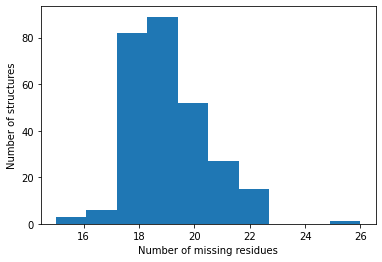

In [137]:
missing_ind = dist_analy.pca.hist_missing_structure(dist_mat_list_0, 40, bins=10)
print([dist_mat_pdb_0[x] for x in missing_ind])

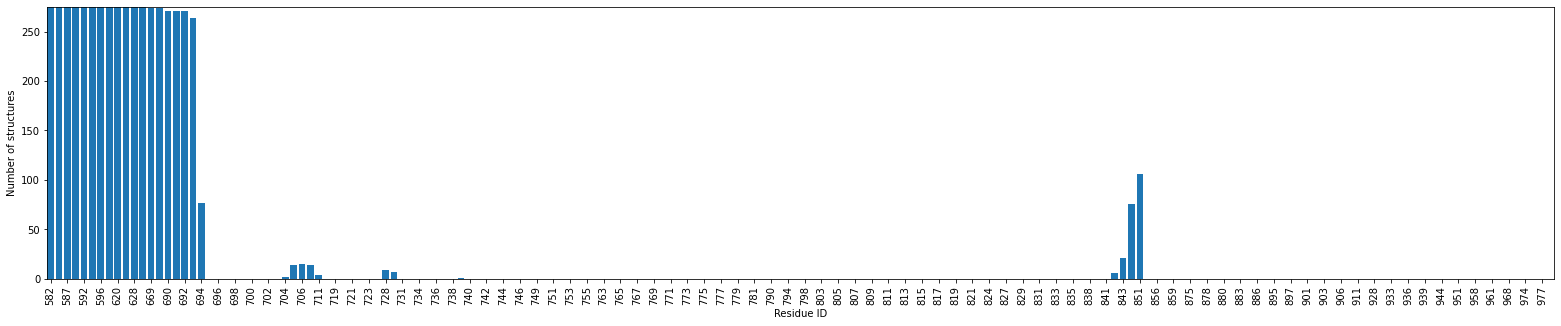

In [138]:
res_get = dist_analy.pca.hist_missing_residue(dist_mat_list_0, egfr_klifs_ident)

### PCA + hierarchical clustering

removing residues not available in every structure
original length of residue list 174; remove 31 residues
3
PCA


No handles with labels found to put in legend.


link_cols
dendrogram
plot PCA
cluster size: 136 g
cluster size: 107 r
cluster size: 7 c
cluster size: 25 m
[0.5488519  0.12242029]


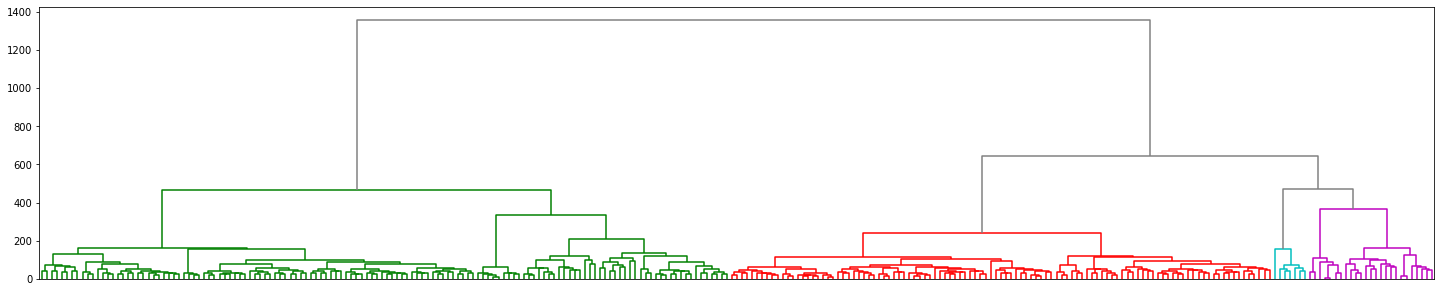

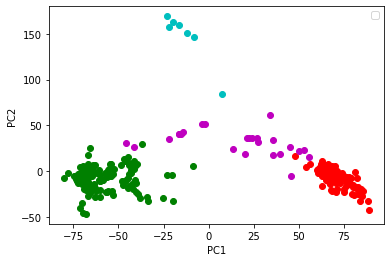

In [111]:
dist_mat_list_0 = np.array(dist_mat_list_0)
dist_mats_0, res_list_0, ind_list_0, inds_fc_0, medoid_ind_list_0 = dist_analy.pca.run(dist_mat_list_0, egfr_klifs_ident_1, 4)

In [119]:
## remaining residues after removing the residues that are missing
print(res_list_0)

[705, 706, 708, 711, 715, 716, 717, 718, 719, 725, 726, 727, 728, 729, 731, 733, 740, 741, 742, 743, 744, 745, 746, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 771, 772, 773, 774, 775, 776, 777, 778, 779, 781, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 810, 814, 815, 816, 817, 820, 821, 822, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 848, 851, 852, 853, 854, 855, 856, 857, 877, 878, 879, 880, 882, 883, 884, 886, 892, 895, 896, 897, 898, 901, 902, 903, 905, 906, 909, 911, 914, 928, 930, 933, 935, 936, 938, 939, 942, 944, 950, 951, 954, 958, 959, 961, 964, 968, 973, 974, 975, 977, 981]


In [141]:
## output the name of the PDB file along with the chain
for i, ind_fc in enumerate(inds_fc_0):
    print("Cluster %i"%(i+1))
    print([dist_mat_pdb_0[x] for x in ind_fc])

Cluster 1
['5GTY_G', '5GTY_H', '5GTY_D', '5GTY_E', '5GTY_C', '5GTY_F', '5GTY_A', '5GTY_B', '6P8Q_C', '6P8Q_B', '6P8Q_D', '6P1L_C', '6P1D_B', '4ZSE_D', '5X2A_D', '6P1D_C', '6P8Q_A', '6P1L_A', '6P1L_D', '5D41_A', '5D41_B', '6DUK_F', '6DUK_A', '6DUK_D', '6DUK_C', '6P1D_D', '6DUK_B', '6DUK_E', '3LZB_D', '3LZB_C', '3LZB_A', '3LZB_B', '6V5P_A', '6V66_D', '6V6K_G', '6V6O_D', '6V6K_D', '6V6K_F', '6V66_B', '6V6K_A', '6V6K_C', '6V6O_G', '4I22_A', '4I24_A', '6V66_C', '6V6K_E', '6V6O_H', '6V6O_C', '6V6O_E', '6V6K_H', '6V6O_B', '6V6K_B', '6V6O_F', '4ZSE_A', '5X2A_A', '5CNN_A', '5CNO_A', '3GT8_D', '3GT8_A', '3GT8_B', '6V66_A', '6V5N_D', '6V5P_D', '6V6O_A', '5X2F_A', '5X2A_C', '5X2F_C', '5X2F_D', '5X2C_A', '5X2C_B', '5X2F_B', '4I24_B', '5X2A_B', '6P1L_B', '4ZSE_B', '4ZSE_C', '6P1D_A', '5YU9_C', '5YU9_B', '5YU9_D', '5YU9_A', '6V5N_A', '6V5N_B', '6V5P_B', '6V5N_C', '6V5P_C', '5HG7_A', '5HG9_A', '5UGC_A', '5UG8_A', '5UG9_A', '5UGA_A', '5U8L_A', '5HG5_A', '5HG8_A', '1XKK_A', '2RGP_A', '3BEL_A', '3W32_A',

In [126]:
def plot_r1r2(r1r2_feat, inds_fc, dist_mats):
    r1_feat = []
    r2_feat = []
    for feat in r1r2_feat:
        if feat[-1] > 0:
            r1_feat.append(feat)
        else:
            r2_feat.append(feat)
    cl = ['g','r','c','m','y']
    plt.figure()
    for i,ind_fc in enumerate(inds_fc):
        r1_dist, r2_dist = [], []
        for mat in dist_mats[ind_fc]:
            temp1 = 0
            for r1 in r1_feat:
                temp1 += mat[r1[0]][r1[1]]
            temp2 = 0
            for r2 in r2_feat:
                temp2 += mat[r2[0]][r2[1]]
            r1_dist.append(temp1)
            r2_dist.append(temp2)
        plt.scatter(r1_dist, r2_dist, color = cl[i] )
    plt.xlabel("R1")
    plt.ylabel("R2")
    
def plot_stacked_histogram(r1,r2,mats,idents,inds_fc,var=None):
    #max_dist = np.amax(mats)
    min_val = 1000
    max_val = 0
    clust_value = []
    for ind_fc in inds_fc:
        value = []
        for x in ind_fc:
            mat = mats[x]
#         for mat in [mats[x] for x in ind_fc]:
            if mat[r1,r2] != 0:
                if mat[r1,r2] > max_val: max_val = mat[r1,r2]
                if mat[r1,r2] < min_val: min_val = mat[r1,r2]
                value.append(mat[r1,r2])
#                 if mat[r1,r2] < 2.2:
#                     print('pdb', x)
        clust_value.append(value)
    bins=np.arange(min_val-1,max_val+1,0.15)
   # print(bins)
    plt.figure()
    cl = ['g','r','c','m','y']
    n,bins,patches = plt.hist(x=clust_value, bins=bins, stacked=True, color=cl[:len(inds_fc)] )    
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    title = ""
    for ident in idents:
        title=title + "/Indices %i and %i "%(ident[r1],ident[r2])
    if var:
        title=title+ "Variance %.3f"%var[r1,r2]
    plt.title(title)

Comparing the structures in cluster x and cluster y, determine the important residue–residue distance pairs that differentiate the two clusters. This is determined by taking the distance pairs at a cutoff of minimum distance < 3.5 and the |SMD| < 3.5.

3
[0.17223723 0.83426088 1.46141098 ... 0.04955622 0.05119936 0.00976717]
[0.13612775 0.26858444 1.01305495 ... 0.09949131 0.19419908 0.13548862]
cluster 1 stabilizing interactions
R705-L778: 2.257, 4.134
A767-R776: 2.300, 4.014
K745-D855: 2.310, 3.556
cluster 2 stabilizing interactions
Q791-K852: 2.584, -3.560
Y764-S768: 2.296, -3.591
M766-T790: 2.831, -3.785
I759-L788: 2.757, -4.771
E762-L788: 3.261, -4.813
E762-C797: 3.352, -4.823
K745-I759: 3.099, -5.984
K745-E762: 2.496, -9.730


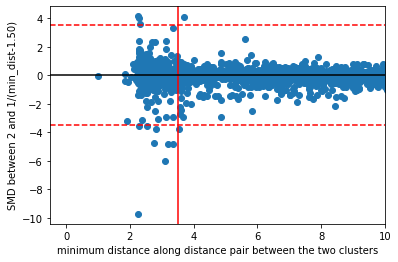

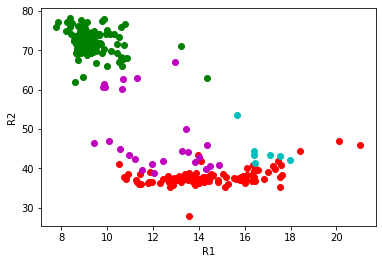

In [131]:
c1 = 1
c2 = 0

feats_0 = dist_analy.pca.triu_flatten(dist_mats_0, len(res_list_0))

smd_0, min_dist_0 = dist_analy.pca.calc_cluster_smd(inds_fc_0[c1], inds_fc_0[c2], feats_0, std = 'SMD')
r1r2_feat_0 = dist_analy.pca.plot_smd(c1, c2, feats_0, min_dist_0, smd_0, res_list_0, uniprot_seq, xcutoff=3.5, ycutoff=3.5, top=25)
plot_r1r2(r1r2_feat_0, inds_fc_0, dist_mats_0)

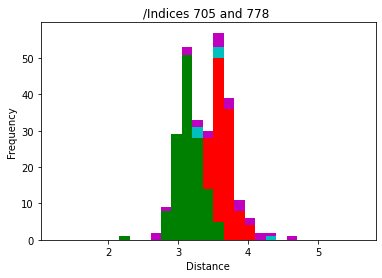

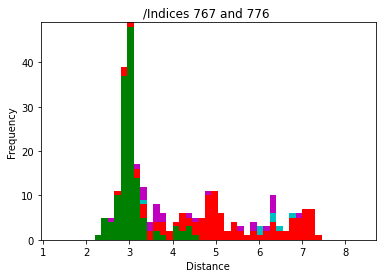

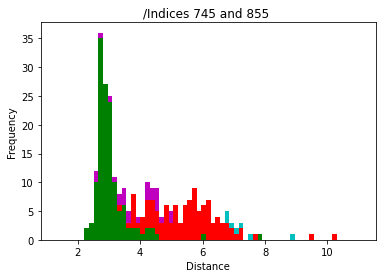

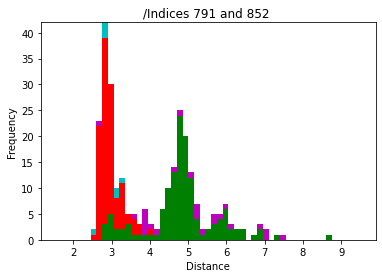

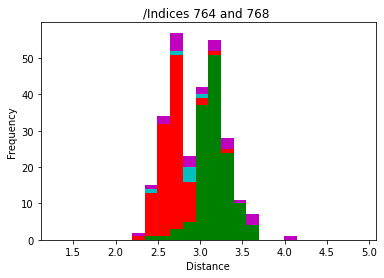

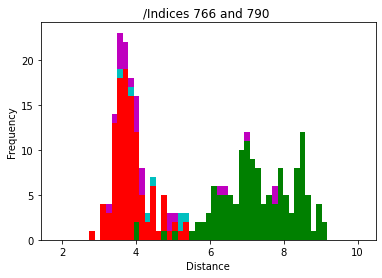

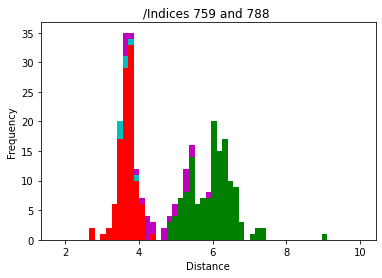

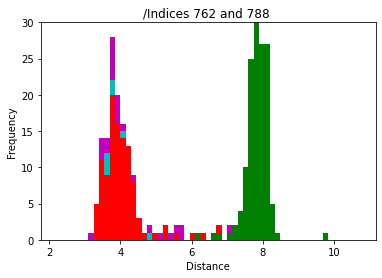

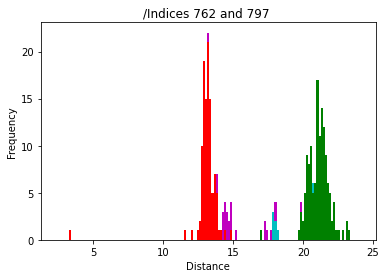

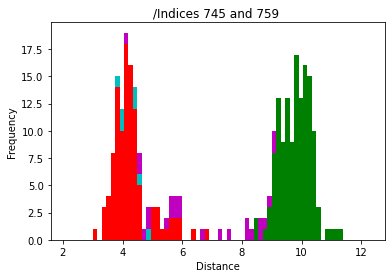

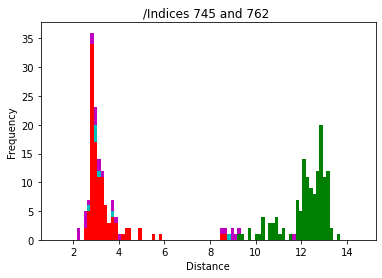

In [129]:
for r1,r2,index, shortest, zscore in r1r2_feat_0:
    plot_stacked_histogram(r1,r2,dist_mats_0,[res_list_0],inds_fc_0,var=None)

In [132]:
# r1=745
# r2=860
# plot_stacked_histogram(egfr_klifs_ident_1.index(r1),egfr_klifs_ident_1.index(r2),dist_mats_0,[res_list_0],inds_fc_0,var=None)

Cluster 2 is the active state structure because it contains structures that have the important K745-E762 electrostatic interaction

3
[ 0.10646857  0.1706325  -0.26939278 ...  0.14077959  0.10079666
  0.02867297]
[0.10903882 0.25677409 0.97492699 ... 0.1001975  0.22440652 0.1378508 ]
cluster 3 stabilizing interactions
C775-D855: 2.671, 9.642
L792-L844: 3.350, 9.616
T790-D855: 2.429, 8.757
A743-F856: 2.986, 5.783
M793-P794: 3.066, 4.208
cluster 2 stabilizing interactions
S768-R831: 1.930, -4.129
E758-G857: 2.883, -4.603
V765-F856: 3.184, -4.843
I853-F856: 3.284, -5.234
V774-F856: 2.881, -5.508
D837-D855: 2.721, -6.395
N842-D855: 2.802, -7.112


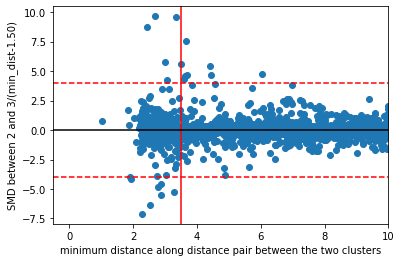

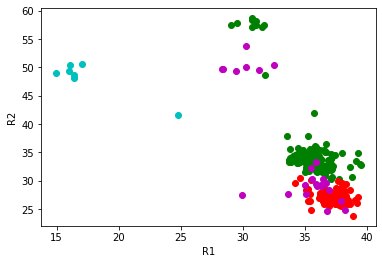

In [134]:
c1 = 1
c2 = 2

feats_0 = dist_analy.pca.triu_flatten(dist_mats_0, len(res_list_0))

smd_1, min_dist_1 = dist_analy.pca.calc_cluster_smd(inds_fc_0[c1], inds_fc_0[c2], feats_0, std = 'SMD')
r1r2_feat_1 = dist_analy.pca.plot_smd(c1, c2, feats_0, min_dist_1, smd_1, res_list_0, uniprot_seq, xcutoff=3.5, ycutoff=4, top=25)
plot_r1r2(r1r2_feat_1, inds_fc_0, dist_mats_0)

3
[ 0.07637725  0.03609679 -1.25073182 ...  0.08856841  0.10855877
 -0.02676165]
[0.14260705 0.17355042 1.05651539 ... 0.09042137 0.25713448 0.18367407]
cluster 4 stabilizing interactions
N771-H773: 2.140, 1.980
I740-P741: 2.296, 1.877
K745-D855: 2.545, 1.729
cluster 2 stabilizing interactions
V774-F856: 2.881, -1.722
I759-L788: 2.757, -1.796
Y764-S768: 2.296, -1.865
L828-L833: 2.564, -1.908
V765-F856: 2.787, -2.140
S768-R831: 1.930, -3.058
Q791-K852: 2.584, -3.462


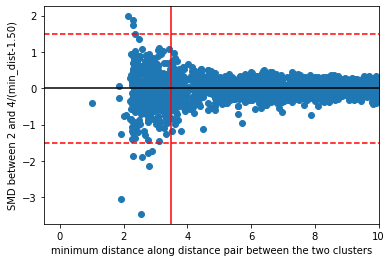

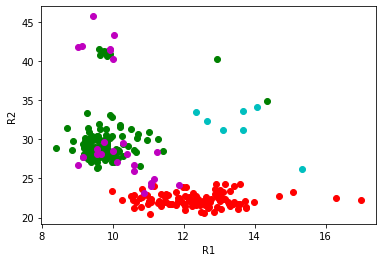

In [136]:
c1 = 1
c2 = 3

feats_0 = dist_analy.pca.triu_flatten(dist_mats_0, len(res_list_0))

smd_2, min_dist_2 = dist_analy.pca.calc_cluster_smd(inds_fc_0[c1], inds_fc_0[c2], feats_0, std = 'SMD')
r1r2_feat_2 = dist_analy.pca.plot_smd(c1, c2, feats_0, min_dist_2, smd_2, res_list_0, uniprot_seq, xcutoff=3.5, ycutoff=1.5, top=25)
plot_r1r2(r1r2_feat_2, inds_fc_0, dist_mats_0)